In [1]:
from utils import WearDetector
from utils import Grayscaler
from utils import Cropper
from utils import Augumentator

/workspaces/coding zm
/workspaces/coding zm
/workspaces/coding zm


/workspaces/coding zm/utils/grayscaling.py:10: SyntaxWarning: invalid escape sequence '\P'
  default_folderRead = Path('read\PixelLabelData')


In [2]:
model = WearDetector()
model.load_data({'images':'dataset/train/imgs','masks':'dataset/train/msks'})
model.load_model('models/wear_detector_model_10epochs_10e3lr_dice_loss.h5')

Model loaded from models/wear_detector_model_10epochs_10e3lr_dice_loss.h5


In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train, y_test = train_test_split(model.X, model.y, test_size=0.2, random_state=42)    
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(80, 512, 512)
(20, 512, 512)
(80, 512, 512)
(20, 512, 512)


In [4]:
import numpy as np
predicted_masks = model.predict_for_pics(np.array(X_test))

2024-07-21 15:31:21.011310: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 335544320 exceeds 10% of free system memory.
2024-07-21 15:31:21.068825: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 335544320 exceeds 10% of free system memory.
2024-07-21 15:31:21.781117: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 335544320 exceeds 10% of free system memory.
2024-07-21 15:31:21.967896: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 335544320 exceeds 10% of free system memory.
2024-07-21 15:31:22.022141: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 671088640 exceeds 10% of free system memory.


In [9]:
# create masks and scale 
scaler = Grayscaler('dataset/labeled','dataset/msks')
scaler.run()
scaler.thresholds

Dataset size:  25
Found Colors (unique greyscale values [0..255]):  2
Minimum Threshold: 0
Maximum Threshold: 1
New greyscale values:  [  0. 255.]
Images processed and saved to: dataset/msks


array([0., 1., 2.])

In [12]:
import os
import cv2

if not os.path.exists('temp_in'): os.makedirs('temp_in')
for id in range(len(predicted_masks)):
    cv2.imwrite('temp_in/' + str(id) + '.png', predicted_masks[id]*255)
if not os.path.exists('temp_out'): os.makedirs('temp_out')
grayscaler = Grayscaler('temp_in','temp_out')

predicted_masks_scaled = grayscaler.run()

Dataset size:  20
Found Colors (unique greyscale values [0..255]):  5
Minimum Threshold: 122
Maximum Threshold: 126
New greyscale values:  [  0. 255.]
Images processed and saved to: temp_out


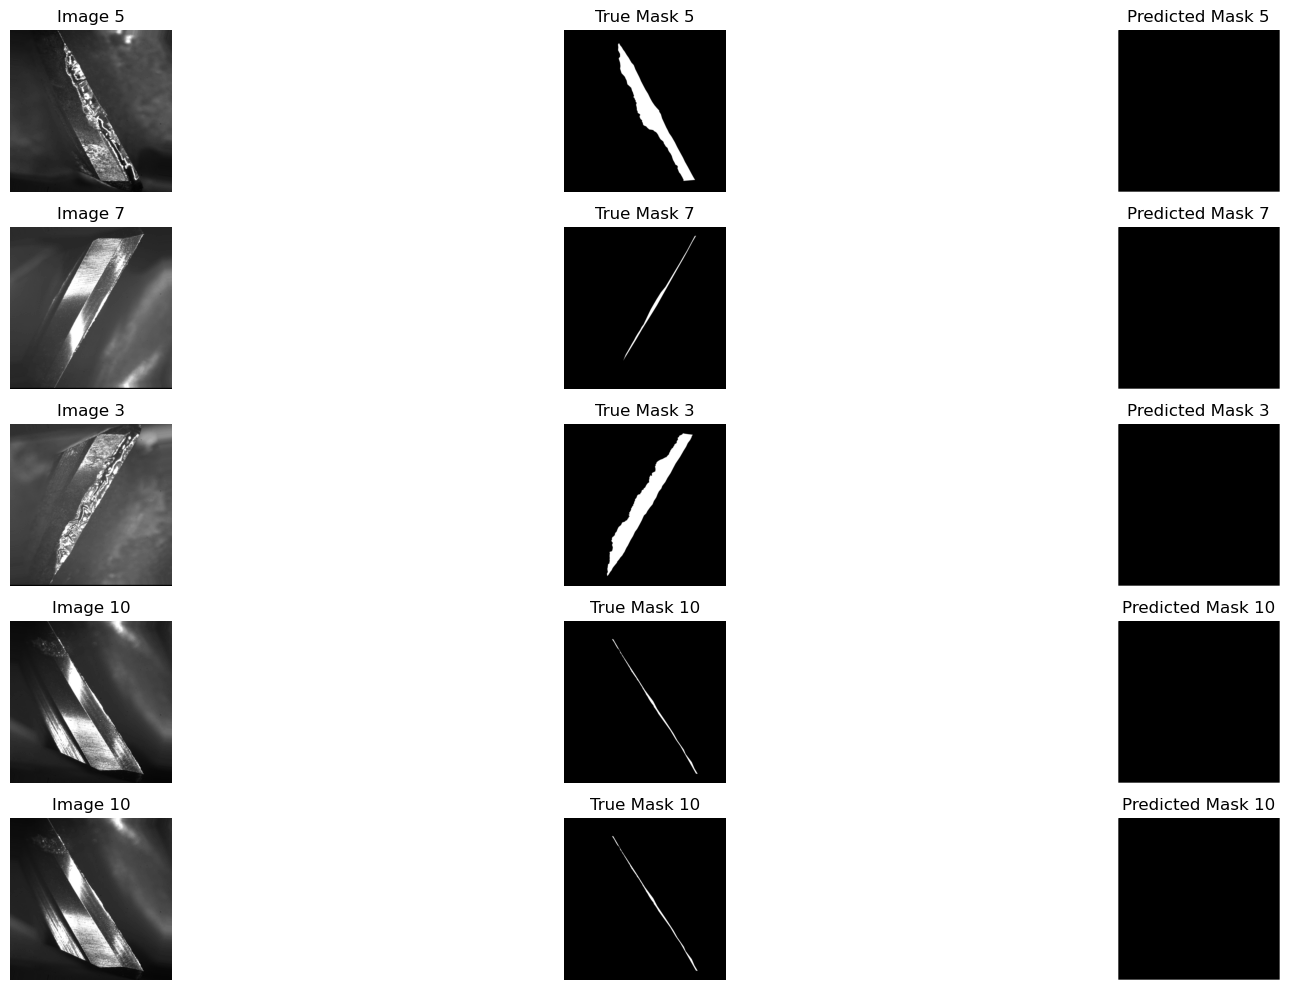

In [13]:
import matplotlib.pyplot as plt
import random
def display_predictions(images, true_masks, predicted_masks, num_images=5):
    """
    Display original images, true masks, and predicted masks side by side.

    Parameters:
    - images: List of images.
    - true_masks: List of true masks.
    - predicted_masks: List of predicted masks.
    - num_images: Number of image-mask pairs to display.
    """
    plt.figure(figsize=(20, 10))
    
    for i in range(num_images):
        idx = random.randint(0, len(images) - 1)
        image = images[idx]
        true_mask = true_masks[idx]
        predicted_mask = predicted_masks[idx]
        
        # Display image
        plt.subplot(num_images, 3, 3 * i + 1)
        plt.imshow(image, cmap='gray' if image.ndim == 2 else None)
        plt.title(f'Image {idx + 1}')
        plt.axis('off')
        
        # Display true mask
        plt.subplot(num_images, 3, 3 * i + 2)
        plt.imshow(true_mask, cmap='gray')
        plt.title(f'True Mask {idx + 1}')
        plt.axis('off')
        
        # Display predicted mask
        plt.subplot(num_images, 3, 3 * i + 3)
        plt.imshow(predicted_mask, cmap='gray')
        plt.title(f'Predicted Mask {idx + 1}')
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()

# Call the function to display predictions
display_predictions(X_test, y_test, predicted_masks_scaled)

In [6]:
print('')

In [10]:
predicted_masks[0]

array([[[0.489539  ],
        [0.4847108 ],
        [0.48369026],
        ...,
        [0.48374555],
        [0.4841143 ],
        [0.48932284]],

       [[0.48819476],
        [0.48086363],
        [0.47976685],
        ...,
        [0.4789574 ],
        [0.48036188],
        [0.48604146]],

       [[0.48648888],
        [0.4806765 ],
        [0.4781362 ],
        ...,
        [0.47768643],
        [0.4794516 ],
        [0.4853307 ]],

       ...,

       [[0.48753715],
        [0.47998318],
        [0.48015243],
        ...,
        [0.47746664],
        [0.48108026],
        [0.48519695]],

       [[0.48801133],
        [0.48376295],
        [0.4811282 ],
        ...,
        [0.48087004],
        [0.4816963 ],
        [0.48602107]],

       [[0.49398452],
        [0.491312  ],
        [0.49078912],
        ...,
        [0.49008352],
        [0.49083552],
        [0.4899306 ]]], dtype=float32)

In [8]:
y_test[0]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [8]:
predicted_masks_scaled[0]

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)